In [4]:
from functools import reduce
import pandas as pd

df = pd.read_table('ekspresije.tsv',  index_col=0)
data = [(cell, gene, value) for cell in df.columns
                            for gene, value in df[cell].iteritems()]

<ipython-input-4-0836caa4194a>:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for gene, value in df[cell].iteritems()]


# Exercises 1

**1.1**

In [5]:
def mean_val(array, val):
  array[1][3] += 1
  if val[0] == array[1][0]:
    array[1][1] += 1
    array[1][2] += val[2]
  else:
    # sum/cnt
    array[0].append((array[1][0],array[1][2]/array[1][1]))
    array[1][2] = val[2]
    array[1][1] = 1
    array[1][0] = val[0]

  if array[1][3] == array[1][4]:
    array[0].append((array[1][0],array[1][2]/array[1][1]))

  return array

prev_cell = data[0][0]
cnt = 0
summ = 0
iter = 0
mean_vals = reduce(mean_val, data, [[],[prev_cell, cnt, summ, iter, len(data)-1]])[0]

**1.2**

In [6]:
mean_vals


def convert_to_dict(array, val):
  array[val[0]] = val[1]
  return array

mean_vals_dict = reduce(convert_to_dict, mean_vals, {})


def center(val):
  return val[0], val[1], val[2] - mean_vals_dict[val[0]]

centered = list(map(center, data))
centered

[('cell_0', 'NOC2L', -0.9208760852407262),
 ('cell_0', 'HES4', -0.9208760852407262),
 ('cell_0', 'ISG15', -0.9208760852407262),
 ('cell_0', 'TNFRSF18', 1.0791239147592737),
 ('cell_0', 'TNFRSF4', -0.9208760852407262),
 ('cell_0', 'SDF4', -0.9208760852407262),
 ('cell_0', 'UBE2J2', -0.9208760852407262),
 ('cell_0', 'CPSF3L', -0.9208760852407262),
 ('cell_0', 'AURKAIP1', 0.07912391475927383),
 ('cell_0', 'CCNL2', -0.9208760852407262),
 ('cell_0', 'MRPL20', -0.9208760852407262),
 ('cell_0', 'SSU72', 0.07912391475927383),
 ('cell_0', 'MIB2', 1.0791239147592737),
 ('cell_0', 'CDK11A', -0.9208760852407262),
 ('cell_0', 'NADK', -0.9208760852407262),
 ('cell_0', 'GNB1', -0.9208760852407262),
 ('cell_0', 'C1orf86', -0.9208760852407262),
 ('cell_0', 'RER1', 0.07912391475927383),
 ('cell_0', 'RP3-395M20.12', 0.07912391475927383),
 ('cell_0', 'TNFRSF14', -0.9208760852407262),
 ('cell_0', 'WRAP73', -0.9208760852407262),
 ('cell_0', 'LRRC47', -0.9208760852407262),
 ('cell_0', 'C1orf174', -0.92087608

**1.3**

In [7]:
def data_var(array, val):
  array[1][3] += 1
  if val[0] == array[1][0]:
    array[1][1] += 1
    array[1][2] += val[2]**2
  else:
    # sum/cnt
    array[0].append((array[1][0],array[1][2]/array[1][1]))
    array[1][2] = val[2]**2
    array[1][1] = 1
    array[1][0] = val[0]

  if array[1][3] == array[1][4]:
    array[0].append((array[1][0],array[1][2]/array[1][1]))

  return array


prev_cell = centered[0][0]
cnt = 0
summ = 0
iter = 0
variance = reduce(data_var, centered, [[], [prev_cell, cnt, summ, iter, len(data)-1]])[0]



variance

[('cell_0', 27.060235065151407),
 ('cell_1', 14.772731382013905),
 ('cell_2', 16.018791787648073),
 ('cell_3', 9.980851539815506),
 ('cell_4', 19.29571295262077),
 ('cell_5', 9.89581046621491),
 ('cell_6', 24.917425888735902),
 ('cell_7', 11.502149145730824),
 ('cell_8', 32.859082188628506),
 ('cell_9', 17.090594123549497),
 ('cell_10', 12.205737720746404),
 ('cell_11', 9.974820538545151),
 ('cell_12', 16.665586072039755),
 ('cell_13', 17.117490215157336),
 ('cell_14', 25.6983013650498),
 ('cell_15', 21.52122733040555),
 ('cell_16', 10.528313398708061),
 ('cell_17', 14.650743261805479),
 ('cell_18', 58.369791669916225),
 ('cell_19', 23.82886492712428),
 ('cell_20', 11.413542670509493),
 ('cell_21', 18.11216562874305),
 ('cell_22', 14.21068959389867),
 ('cell_23', 7.435198700981297),
 ('cell_24', 38.7502512008745),
 ('cell_25', 47.16607663791573),
 ('cell_26', 20.820860293691528),
 ('cell_27', 13.787062173851824),
 ('cell_28', 12.931373844522183),
 ('cell_29', 15.043890850807028),
 ('ce

**1.4**

In [8]:
from math import sqrt

def _std_dev(val):
  return val[0], val[1], sqrt(val[1])

std_dev = list(map(_std_dev, variance))


std_dev

[('cell_0', 27.060235065151407, 5.20194531547107),
 ('cell_1', 14.772731382013905, 3.8435311085008674),
 ('cell_2', 16.018791787648073, 4.002348284151203),
 ('cell_3', 9.980851539815506, 3.1592485720208066),
 ('cell_4', 19.29571295262077, 4.392688579061891),
 ('cell_5', 9.89581046621491, 3.1457607134387877),
 ('cell_6', 24.917425888735902, 4.9917357591058344),
 ('cell_7', 11.502149145730824, 3.3914818510100897),
 ('cell_8', 32.859082188628506, 5.73228420340692),
 ('cell_9', 17.090594123549497, 4.134077179196042),
 ('cell_10', 12.205737720746404, 3.4936710951013126),
 ('cell_11', 9.974820538545151, 3.15829392845966),
 ('cell_12', 16.665586072039755, 4.08235055722065),
 ('cell_13', 17.117490215157336, 4.137328874425785),
 ('cell_14', 25.6983013650498, 5.069349205277715),
 ('cell_15', 21.52122733040555, 4.63909768493891),
 ('cell_16', 10.528313398708061, 3.2447362602695557),
 ('cell_17', 14.650743261805479, 3.8276289347069),
 ('cell_18', 58.369791669916225, 7.640012543832388),
 ('cell_19'

**1.5**

In [9]:

std_dev_dict = reduce(convert_to_dict, std_dev,{})


def standard_scaler(val):
  cntrd = val
  return cntrd[0], cntrd[1], cntrd[2]/std_dev_dict[cntrd[0]]

ss = list(map(standard_scaler, centered))
ss

[('cell_0', 'NOC2L', -0.03403060184154293),
 ('cell_0', 'HES4', -0.03403060184154293),
 ('cell_0', 'ISG15', -0.03403060184154293),
 ('cell_0', 'TNFRSF18', 0.039878586130576016),
 ('cell_0', 'TNFRSF4', -0.03403060184154293),
 ('cell_0', 'SDF4', -0.03403060184154293),
 ('cell_0', 'UBE2J2', -0.03403060184154293),
 ('cell_0', 'CPSF3L', -0.03403060184154293),
 ('cell_0', 'AURKAIP1', 0.0029239921445165435),
 ('cell_0', 'CCNL2', -0.03403060184154293),
 ('cell_0', 'MRPL20', -0.03403060184154293),
 ('cell_0', 'SSU72', 0.0029239921445165435),
 ('cell_0', 'MIB2', 0.039878586130576016),
 ('cell_0', 'CDK11A', -0.03403060184154293),
 ('cell_0', 'NADK', -0.03403060184154293),
 ('cell_0', 'GNB1', -0.03403060184154293),
 ('cell_0', 'C1orf86', -0.03403060184154293),
 ('cell_0', 'RER1', 0.0029239921445165435),
 ('cell_0', 'RP3-395M20.12', 0.0029239921445165435),
 ('cell_0', 'TNFRSF14', -0.03403060184154293),
 ('cell_0', 'WRAP73', -0.03403060184154293),
 ('cell_0', 'LRRC47', -0.03403060184154293),
 ('cell

# Exercises 2

**2.1**

In [10]:
ss_sorted = sorted(ss, key=lambda x: x[1])


def mean_val_gene(array, val):
  array[1][3] += 1
  if val[1] == array[1][0]:
    array[1][1] += 1
    array[1][2] += val[2]
  else:
    # sum/cnt
    array[0].append((array[1][0],array[1][2]/array[1][1]))
    array[1][2] = val[2]
    array[1][1] = 1
    array[1][0] = val[1]

  if array[1][3] == array[1][4]:
    array[0].append((array[1][0],array[1][2]/array[1][1]))

  return array

prev_gene = ss_sorted[0][1]
cnt = 0
summ = 0
iter = 0
mean_vals_gene = reduce(mean_val_gene, ss_sorted, [[], [prev_gene, cnt, summ, iter, len(ss_sorted)-1]])[0]


mean_vals_gene_dict = reduce(convert_to_dict, mean_vals_gene, {})

def center_gene(val):
  return val[0], val[1], val[2] - mean_vals_gene_dict[val[1]]



centered_gene = list(map(center_gene, ss_sorted))


def data_var_gene(array, val):
  array[1][3] += 1
  if val[1] == array[1][0]:
    array[1][1] += 1
    array[1][2] += val[2]**2
  else:
    # sum/cnt
    array[0].append((array[1][0],array[1][2]/array[1][1]))
    array[1][2] = val[2]**2
    array[1][1] = 1
    array[1][0] = val[1]

  if array[1][3] == array[1][4]:
    array[0].append((array[1][0],array[1][2]/array[1][1]))

  return array


prev_gene = centered_gene[0][1]
cnt = 0
summ = 0
iter = 0
variance_gene = reduce(data_var_gene, centered_gene, [[], [prev_gene, cnt, summ, iter, len(ss_sorted)-1]])[0]


len(variance_gene)


5068

**2.2**

In [11]:
variance_gene_sorted = sorted(variance_gene, key=lambda x: -x[1])

def top_500(array, val):
  array[1] += 1
  if array[1] <= 500:
    array[0].append(val)
  return array

top_var = reduce(top_500, variance_gene_sorted, [[],0])[0]

**2.3**

In [12]:
def convert_to_dict(array, val):
  array[val[0]] = 1
  return array

top_var_dict = reduce(convert_to_dict, top_var, {})


def filtering(array, val):
  if val[1] in top_var_dict.keys() and val[2]:
      array.append(val)
  return array

filtered = reduce(filtering, ss, [])

**2.4**

In [13]:
filtered_sorted = sorted(filtered, key = lambda x: (x[1], x[2]))

**2.5**

In [14]:
def _rank_norm(array, val):
  if array[1][0] != val[1]:
    array[1][2] = 1
    array[1][0] = val[1]
    array[1][1] = val[2]
  else:
    if array[1][1] < val[2]:
      array[1][2] += 1
      array[1][1] = val[2]
  array[0].append((val[0], val[1], val[2], array[1][2]))
  return array

rank = 1
prev_gene = filtered_sorted[0][1]
prev_val = filtered_sorted[0][2]

rank_norm = reduce(_rank_norm, filtered_sorted, [[],[prev_gene, prev_val, rank]])[0]

**2.6**

In [15]:
def rem(val):
  return val[0]

top_var_only = list(map(rem, top_var))
top_var_only

['FTL',
 'B2M',
 'MALAT1',
 'FTH1',
 'LYZ',
 'TMSB4X',
 'S100A9',
 'ACTB',
 'RPL13',
 'RPL13A',
 'RPL10',
 'NKG7',
 'CD74',
 'RPS2',
 'RPS6',
 'RPS3',
 'RPL3',
 'HLA-DRA',
 'MT-CO1',
 'RPL11',
 'RPS18',
 'RPL19',
 'GNLY',
 'RPLP1',
 'RPS12',
 'CST3',
 'TMSB10',
 'RPL32',
 'S100A8',
 'HLA-C',
 'RPS27',
 'S100A4',
 'RPS14',
 'RPS27A',
 'RPS4X',
 'RPS19',
 'RPL18A',
 'TPT1',
 'RPS3A',
 'HLA-A',
 'RPS15A',
 'GNB2L1',
 'RPS8',
 'CCL5',
 'EEF1A1',
 'MT-CO2',
 'LTB',
 'TYROBP',
 'RPL21',
 'RPL28',
 'RPL10A',
 'GZMB',
 'RPL23A',
 'RPL15',
 'RPLP2',
 'RPL12',
 'RPL6',
 'RPL34',
 'RPS7',
 'PTMA',
 'RPS5',
 'COTL1',
 'EIF1',
 'RPSA',
 'RPS9',
 'JUNB',
 'RPL27A',
 'HLA-DPB1',
 'LGALS1',
 'ACTG1',
 'SH3BGRL3',
 'C16orf13',
 'OAZ1',
 'RPL14',
 'FOS',
 'RPS15',
 'RPL18',
 'RPL29',
 'RPL8',
 'RPS16',
 'VIM',
 'RPL9',
 'RPL7',
 'PFN1',
 'SAT1',
 'MT-CO3',
 'S100A6',
 'RPL30',
 'RPL26',
 'HLA-DRB1',
 'HLA-DPA1',
 'CCL4',
 'CYBA',
 'COX4I1',
 'HLA-E',
 'LST1',
 'CTSS',
 'RPL7A',
 'BTG1',
 'DUSP1',
 'RPS2

#Exercises 3


**3.1**

In [16]:
sorted_cell_gene = sorted(filtered, key = lambda x: (x[0], x[1]))


def group_by_cell(array, val):
  array[1][2] += 1
  if array[1][0] == val[0]:
    array[1][1].append(val[2])
  else:
    array[0].append((array[1][0], array[1][1]))
    array[1][1] = [val[2]]
    array[1][0] = val[0]

  if array[1][2] == array[1][3]:
    array[0].append((array[1][0], array[1][1]))

  return array

prev_cell = sorted_cell_gene[0][0]
curr_arr = []
iter = 0
grouped = reduce(group_by_cell, sorted_cell_gene, [[],[prev_cell, curr_arr, iter, len(sorted_cell_gene)-1]])[0]


grouped

Output hidden; open in https://colab.research.google.com to view.

**3.2**

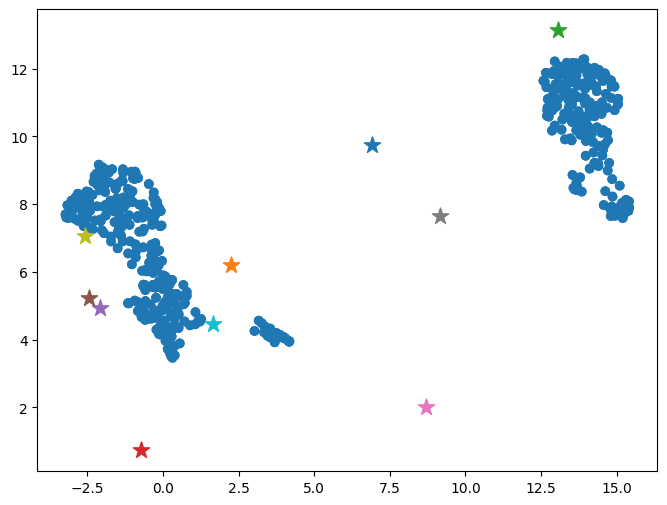

In [18]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np

embedding = pd.read_table('umap.tsv')
embedding['cluster'] = 0
plt.figure(figsize=(8, 6))
plt.scatter(
    embedding.umap1,
    embedding.umap2,
    c=[sn.color_palette()[x] for x in embedding.cluster])


k = 10
np.random.seed(3)
centroids = np.random.uniform(-3, 15, (k, 2))


# Da pogledamo rezultat
plt.scatter(embedding.umap1,embedding.umap2,c=[sn.color_palette()[x] for x in embedding.cluster])
for c in centroids:
  plt.scatter(*c, marker='*', s=150)

first part

[2, 2, 9, 4, 8, 2, 8, 2, 9, 8, 8, 2, 2, 4, 8, 8, 9, 2, 2, 2, 9, 9, 8, 8, 2, 8, 2, 2, 8, 2, 2, 8, 8, 2, 4, 8, 8, 4, 9, 4, 8, 8, 2, 2, 9, 8, 8, 2, 2, 9, 2, 2, 9, 2, 9, 8, 2, 8, 9, 8, 9, 2, 8, 8, 9, 8, 8, 8, 2, 2, 2, 9, 8, 8, 9, 8, 2, 2, 4, 9, 2, 2, 2, 4, 2, 2, 8, 8, 2, 9, 4, 4, 4, 2, 2, 2, 2, 8, 2, 2, 2, 8, 9, 8, 8, 1, 8, 8, 2, 2, 4, 8, 2, 4, 2, 9, 9, 2, 8, 4, 8, 2, 7, 2, 9, 9, 4, 8, 8, 9, 8, 2, 9, 4, 9, 9, 9, 8, 9, 2, 2, 9, 8, 8, 7, 2, 9, 9, 2, 2, 9, 8, 8, 2, 9, 2, 2, 2, 2, 9, 8, 4, 8, 2, 2, 2, 2, 2, 9, 8, 4, 8, 2, 7, 2, 9, 8, 2, 9, 8, 9, 2, 2, 8, 2, 8, 2, 2, 2, 2, 2, 8, 8, 8, 2, 8, 9, 8, 2, 2, 9, 2, 8, 2, 8, 8, 9, 2, 2, 8, 2, 8, 2, 8, 9, 1, 9, 8, 8, 2, 8, 8, 2, 9, 2, 9, 8, 4, 8, 8, 2, 9, 4, 2, 2, 9, 9, 2, 4, 8, 2, 8, 4, 2, 8, 2, 9, 4, 2, 9, 8, 2, 9, 2, 8, 2, 9, 9, 8, 9, 2, 2, 8, 2, 2, 8, 8, 9, 9, 9, 2, 8, 9, 8, 2, 2, 8, 7, 7, 2, 8, 2, 9, 8, 8, 9, 2, 2, 8, 8, 8, 9, 2, 9, 9, 9, 2, 2, 8, 2, 9, 8, 2, 9, 8, 7, 2, 2, 9, 8, 9, 2, 9, 8, 2, 9, 2, 4, 4, 8, 8, 2, 2, 2, 2, 2, 8, 9, 2, 8, 9, 2, 8, 

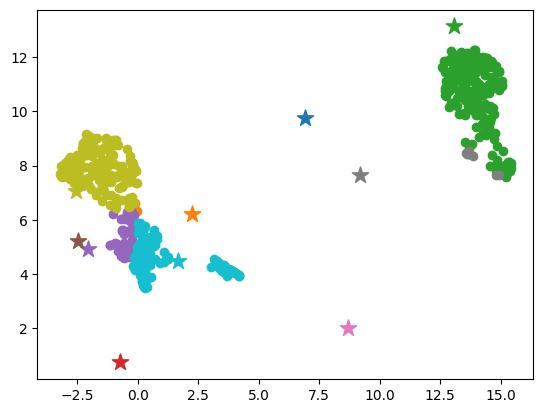

In [19]:
import sys
from functools import reduce
# print(embedding)
def finding_cluster(val):
  miny=sys.maxsize
  min_cluster=0
  # print(val)
  for j in range(len(centroids)):
    distance=np.sqrt(((centroids[j,0]-val[0])**2+(centroids[j,1]-val[1])**2))
    if miny>abs(distance):
      miny=distance
      min_cluster=j
  return min_cluster

matrix = []
for i in range(len(embedding)):
    matrix.append([embedding.umap1[i],embedding.umap2[i]])


cluster_assignments = list(map(finding_cluster, matrix))
print(cluster_assignments)

# Da pogledamo rezultat
for i, c in enumerate(centroids):
  plot = plt.scatter(*c, marker='*', s=150)
  cluster=[[embedding.umap1[j],embedding.umap2[j]] for j in range(len(embedding)) if cluster_assignments[j] == i]
  cluster = np.array(cluster)
  if len(cluster)!=0:
   plt.scatter(cluster[:, 0], cluster[:, 1], c=plot.get_facecolor())

second part

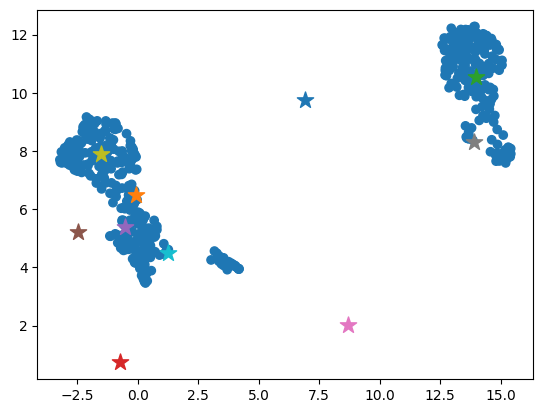

In [20]:
def center_centroids(array,val):
  old_cluster=[[embedding.umap1[j],embedding.umap2[j]] for j in range(len(embedding)) if cluster_assignments[j] == array[1][0]]
  if len(old_cluster)!=0:
    first_position=sum(x[0] for x in old_cluster)/len(old_cluster)
    second_position=sum(x[1] for x in old_cluster)/len(old_cluster)
    array[0].append([first_position,second_position])
  else:
    array[0].append([val[0],val[1]])
  # print(val[1])
  array[1][0]+=1
  return array

iter=0
centroids = np.array(reduce(center_centroids, centroids, [[],[iter]])[0])


plt.scatter(embedding.umap1,embedding.umap2,c=[sn.color_palette()[x] for x in embedding.cluster])
for c in centroids:
  plt.scatter(*c, marker='*', s=150)

third part

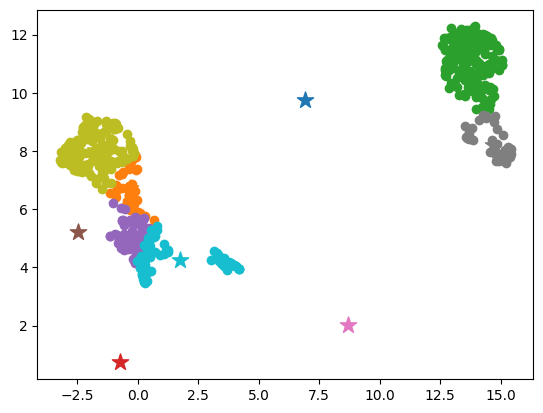

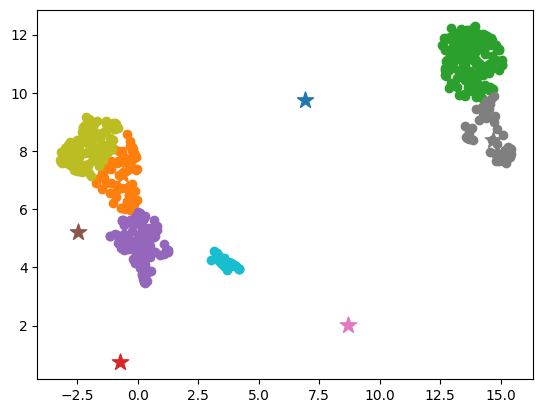

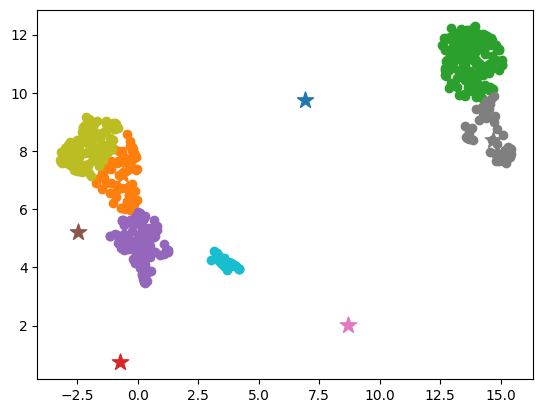

In [21]:
for i in range(250):
  cluster_assignments = list(map(finding_cluster, matrix))
  centroids = np.array(reduce(center_centroids, centroids, [[],[iter]])[0])
  if i+1==1 or i+1==10 or i+1==250:
    for i, c in enumerate(centroids):
      plot = plt.scatter(*c, marker='*', s=150)
      cluster=[[embedding.umap1[j],embedding.umap2[j]] for j in range(len(embedding)) if cluster_assignments[j] == i]
      cluster = np.array(cluster)
      if len(cluster)!=0:
        plt.scatter(cluster[:, 0], cluster[:, 1], c=plot.get_facecolor())
    plt.show()
